<a href="https://colab.research.google.com/github/Slava096/CultureShock_colab_fork/blob/master/CultureShok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title инструкция
#@markdown после заверщения данной ячейки загрузите зарание разделённые дорожки (https://github.com/deezer/spleeter 5stems) в папку data и запустите следующую ечейку
%tensorflow_version 1.x
import tensorflow as tf

# Download the code
!git clone https://github.com/NVlabs/stylegan2.git
%cd stylegan2
!nvcc test_nvcc.cu -o test_nvcc -run

print('Tensorflow version: {}'.format(tf.__version__) )
!nvidia-smi -L
print('GPU Identified at: {}'.format(tf.test.gpu_device_name()))
!mkdir data
%cd data
!wget https://rolux.org/media/stylegan2/vectors/mouth_ratio.npy
!wget https://rolux.org/media/stylegan2/vectors/mouth_open.npy
%cd ..

TensorFlow 1.x selected.
Cloning into 'stylegan2'...
remote: Enumerating objects: 93, done.
remote: Total 93 (delta 0), reused 0 (delta 0), pack-reused 93
Unpacking objects: 100% (93/93), done.
/content/stylegan2
CPU says hello.
GPU says hello.
Tensorflow version: 1.15.2
GPU 0: Tesla K80 (UUID: GPU-5597f5dc-9929-0a35-c8fd-16cc0f1b4db4)
GPU Identified at: /device:GPU:0
/content/stylegan2/data
--2020-04-21 09:59:16--  https://rolux.org/media/stylegan2/vectors/mouth_ratio.npy
Resolving rolux.org (rolux.org)... 138.201.70.161
Connecting to rolux.org (rolux.org)|138.201.70.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73856 (72K)
Saving to: ‘mouth_ratio.npy’

mouth_ratio.npy     100%[===================>]  72.12K   139KB/s    in 0.5s    

2020-04-21 09:59:18 (139 KB/s) - ‘mouth_ratio.npy’ saved [73856/73856]

--2020-04-21 09:59:19--  https://rolux.org/media/stylegan2/vectors/mouth_open.npy
Resolving rolux.org (rolux.org)... 138.201.70.161
Connecting to rolux.

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2039808/45929032 bytes (4.4%)5644288/45929032 bytes (12.3%)9330688/45929032 bytes (20.3%)13156352/45929032 bytes (28.6%)16998400/45929032 bytes (37.0%)20758528/45929032 bytes (45.2%)24412160/45929032 bytes (53.2%)28139520/45929032 bytes (61.3%)31891456/45929032 bytes (69.4%)35512320/45929032 bytes (77.3%)39264256/45929032 bytes (85.5%)42950656/45929032 bytes (93.5%)

100%|██████████| 5349/5349 [00:03<00:00, 1778.41it/s]

[MoviePy] Done.


data/drums.wav
drums
[MoviePy] Writing audio in data/vocals.wav


100%|██████████| 5349/5349 [00:03<00:00, 1769.98it/s]

[MoviePy] Done.


data/vocals.wav
vocals
[MoviePy] Writing audio in data/piano.wav


100%|██████████| 5349/5349 [00:02<00:00, 1826.45it/s]

[MoviePy] Done.


data/piano.wav
piano
[MoviePy] Writing audio in data/bass.wav


100%|██████████| 5349/5349 [00:02<00:00, 1798.06it/s]

[MoviePy] Done.


data/bass.wav
bass
[MoviePy] Writing audio in data/other.wav


100%|██████████| 5349/5349 [00:03<00:00, 1764.13it/s]

[MoviePy] Done.


data/other.wav
other
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Compiling... Loading... Done.
{'drums': array([6.09633424e-01, 4.89600880e-03, 1.20066974e-02, ...,
       1.18094098e-04, 1.79907756e-02, 1.31740727e-02]), 'vocals': array([0.15155412, 0.00062924, 0.0012664 , ..., 0.00071934, 0.00195694,
       0.00442691]), 'piano': array([1.00000000e+00, 2.13529257e-03, 9.29772376e-03, ...,
       2.39882816e-05, 5.35123206e-05, 1.08702143e-04]), 'bass': array([1.00000000e+00, 3.65616856e-04, 9.20511279e-05, ...,
       3.37657548e-06, 1.69459910e-04, 2.59049609e-04]), 'other': array([1.        , 0.00721443, 0.02265901, ..., 0.01338884, 0.10836679,
       0.35837252])}
[MoviePy] >>>> Building video data/vstanSuka2.mp4
[MoviePy] Writing audio in vstanSuka2TEMP_MPY_wvf_snd.mp4


100%|██████████| 5348/5348 [00:08<00:00, 629.62it/s]

[MoviePy] Done.
[MoviePy] Writing video data/vstanSuka2.mp4



100%|██████████| 7277/7277 [10:32<00:00, 11.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: data/vstanSuka2.mp4 



MessageError: ignored

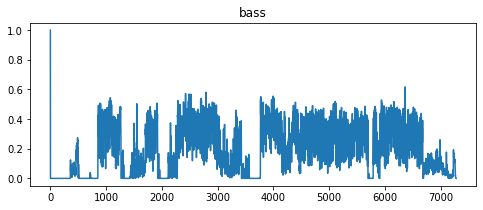

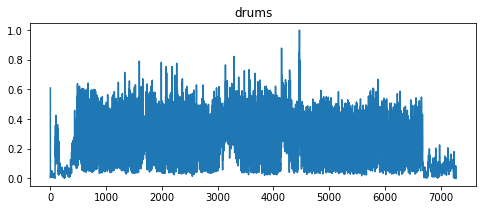

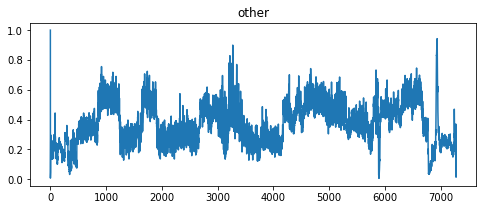

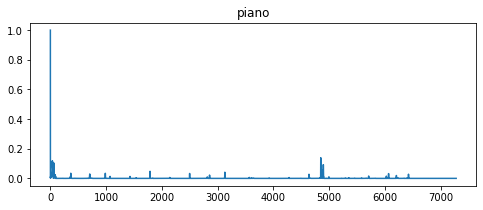

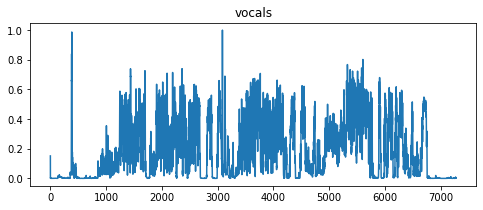

In [0]:
#@title Пораметры генерации / Generation settings
import os
import numpy as np
from scipy.interpolate import interp1d
from scipy.io import wavfile
import matplotlib.pyplot as plt
import PIL.Image
import moviepy.editor

import dnnlib
import dnnlib.tflib as tflib
import pretrained_networks

audio = {}
#@markdown FPS конечного видео/ Final FPS
fps = 30 #@param {type: "number"}

# https://www.google.com/search?q=death+grips+black+google+download
file_type = ".mp3" #@param [".waw", ".mp3"] {allow-input: true}
for mp3_filename in [f for f in os.listdir('data') if f.endswith(file_type)]:
    mp3_filename = f'data/{mp3_filename}'
    wav_filename = mp3_filename[:-4] + '.wav'
    if not os.path.exists(wav_filename):
        audio_clip = moviepy.editor.AudioFileClip(mp3_filename)
        audio_clip.write_audiofile(wav_filename, fps=44100, nbytes=2, codec='pcm_s16le')
    print(wav_filename)
    track_name = os.path.basename(wav_filename)[:-4]
    print(track_name)
    rate, signal = wavfile.read(wav_filename)
    signal = np.mean(signal, axis=1) # to mono
    signal = np.abs(signal)
    seed = signal.shape[0]
    duration = signal.shape[0] / rate
    frames = int(np.ceil(duration * fps))
    samples_per_frame = signal.shape[0] / frames
    audio[track_name] = np.zeros(frames, dtype=signal.dtype)
    for frame in range(frames):
        start = int(round(frame * samples_per_frame))
        stop = int(round((frame + 1) * samples_per_frame))
        audio[track_name][frame] = np.mean(signal[start:stop], axis=0)
    audio[track_name] /= max(audio[track_name])

for track in sorted(audio.keys()):
    plt.figure(figsize=(8, 3))
    plt.title(track)
    plt.plot(audio[track])
    plt.savefig(f'data/{track}.png')

#@markdown Выбор модели / Change model
network_pkl = 'gdrive:networks/stylegan2-church-config-f.pkl' #@param ["gdrive:networks/stylegan2-horse-config-f.pkl", "gdrive:networks/stylegan2-ffhq-config-f.pkl", "gdrive:networks/stylegan2-church-config-f.pkl","gdrive:networks/stylegan2-cat-config-f.pkl","gdrive:networks/stylegan2-car-config-f.pkl"] {allow-input: true}
_G, _D, Gs = pretrained_networks.load_networks(network_pkl)

Gs_kwargs = dnnlib.EasyDict()
Gs_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
Gs_kwargs.randomize_noise = False
Gs_syn_kwargs = dnnlib.EasyDict()
Gs_syn_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
Gs_syn_kwargs.randomize_noise = False
Gs_syn_kwargs.minibatch_size = 4
noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]
w_avg = Gs.get_var('dlatent_avg')

def get_ws(n, frames, seed):
    filename = f'data/ws_{n}_{frames}_{seed}.npy'
    if not os.path.exists(filename):
        src_ws = np.random.RandomState(seed).randn(n, 512)
        ws = np.empty((frames, 512))
        for i in range(512):
            # FIXME: retarded
            x = np.linspace(0, 3*frames, 3*len(src_ws), endpoint=False)
            y = np.tile(src_ws[:, i], 3)
            x_ = np.linspace(0, 3*frames, 3*frames, endpoint=False)
            y_ = interp1d(x, y, kind='quadratic', fill_value='extrapolate')(x_)
            ws[:, i] = y_[frames:2*frames]
        np.save(filename, ws)
    else:
        ws = np.load(filename)
    return ws

def mix_styles(wa, wb, ivs):
    w = np.copy(wa)
    for i, v in ivs:
        w[i] = wa[i] * (1 - v) + wb[i] * v
    return w

def normalize_vector(v):
    return v * np.std(w_avg) / np.std(v) + np.mean(w_avg) - np.mean(v)

def render_frame(t):
    global base_index
    frame = np.clip(np.int(np.round(t * fps)), 0, frames - 1)
    Base_index_track = "other" #@param ["other", "drums", "bass","vocals","piano"] {allow-input: true}
    base_index += base_speed * audio[Base_index_track][frame]**2 
    base_w = base_ws[int(round(base_index)) % len(base_ws)]
    base_w = np.tile(base_w, (18, 1))
    psi_audio = "bass" #@param ["other", "drums", "bass","vocals","piano"] {allow-input: true}
    psi = 0.5 + audio[psi_audio][frame] / 2
    base_w = w_avg + (base_w - w_avg) * psi
    mix_w = np.tile(mix_ws[frame], (18, 1))
    mix_w = w_avg + (mix_w - w_avg) * 0.75
    ranges = [range(0, 4), range(4, 8), range(8, 18)]
    values1 = "drums" #@param ["other", "drums", "bass","vocals","piano"] {allow-input: true}
    values2 = "piano" #@param ["other", "drums", "bass","vocals","piano"] {allow-input: true}
    values3 = "drums" #@param ["other", "drums", "bass","vocals","piano"] {allow-input: true}
    values = [audio[track][frame] for track in [values1, values2,values3]]
    w = mix_styles(base_w, mix_w, zip(ranges, values))
    mauth_open_input = 'vocals' #@param ["other", "drums", "bass","vocals","piano"] {allow-input: true}
    w += mouth_open * audio[mauth_open_input][frame] * 1.5
    image = Gs.components.synthesis.run(np.stack([w]), **Gs_syn_kwargs)[0]
    image = PIL.Image.fromarray(image).resize((size, size), PIL.Image.LANCZOS)
    return np.array(image)
    
size = 512 #@param {type: "number"}
seconds = int(np.ceil(duration))
resolution = 10 #@param {type: "slider", min: 1, max: 20}
base_frames = resolution * frames
base_ws = get_ws(seconds, base_frames, seed)
print(audio)
base_speed = base_frames / sum(audio['other']**2)
base_index = 0
mix_ws = get_ws(seconds, frames, seed + 1)
# https://rolux.org/media/stylegan2/vectors/mouth_ratio.npy
mouth_open = normalize_vector(-np.load('data/mouth_ratio.npy'))


video_clip = moviepy.editor.VideoClip(render_frame, duration=duration)

audio_clip_input = "/content/stylegan2/data/2.m4a" #@param {type: "string"}

mp4_filename = 'data/vstanSuka2.mp4' #@param {type: "string"}

from google.colab import files


audio_clip = moviepy.editor.AudioFileClip(audio_clip_input)
video_clip = video_clip.set_audio(audio_clip)
video_clip.write_videofile(mp4_filename, fps=fps, codec='libx264', audio_codec='aac', bitrate='8M')
files.download(mp4_filename)